# Time Series Analysis Project
### Part 2: Decompose Google Trends search interest time series into components
### Written By Ali Chen

### Import Packages

In [12]:
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
from statsmodels.tsa import seasonal

In [13]:
#Import CSV file with Hulu data and parse through dates
hulu = pd.read_csv('hulu.googletrends.csv', parse_dates = ['period'])

#Specify date/time objects in pandas
hulu['period'] = hulu['period'].dt.date

#Sets dates as index so that it is easier to merge datasets and parse through the data
hulu.set_index('period', inplace = True)

### Create variables for Years and Months

In [14]:
#Create variable for years and months 
#The DataFormatter will pull out the correct number for each line of data
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearmonth = mdates.DateFormatter('%m.%y')

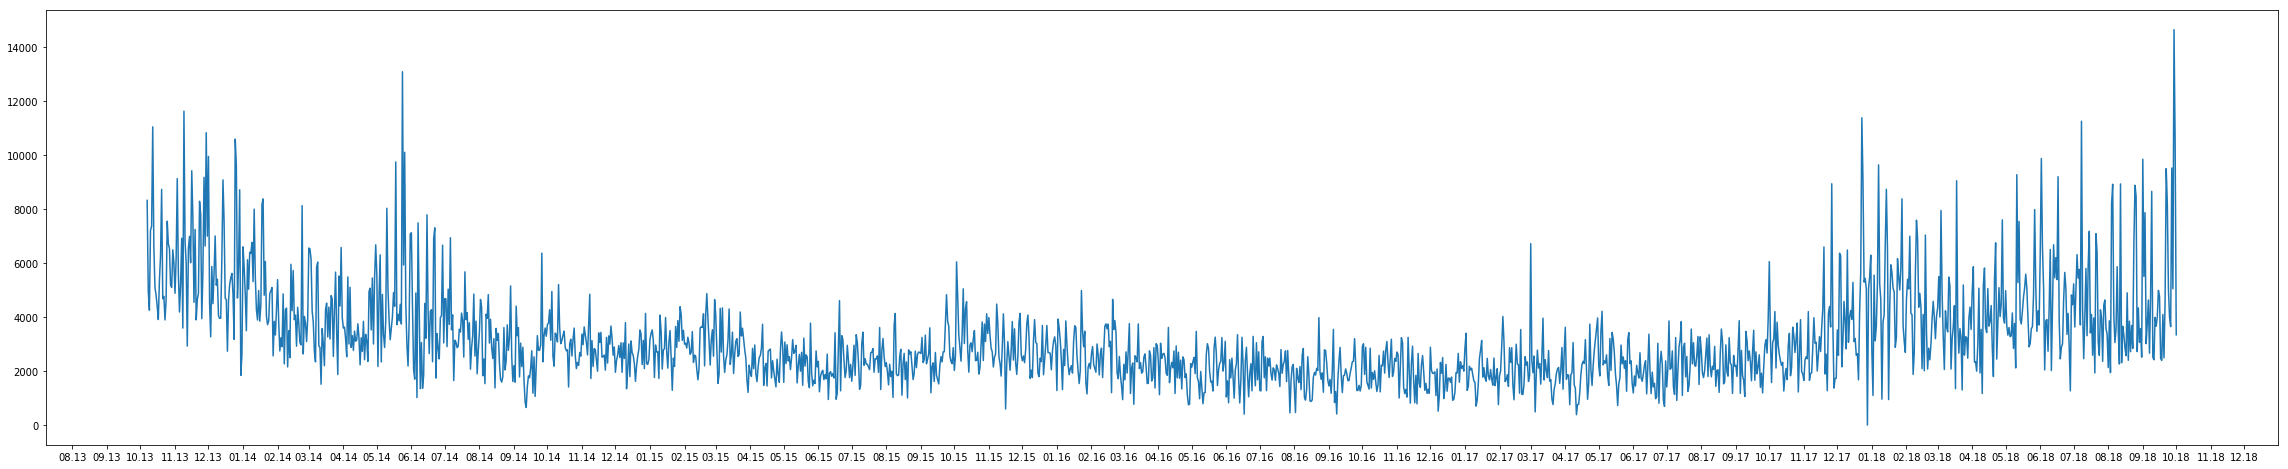

In [15]:
#Set up graph to make the view size larger
dimensions = (40,8)
fig, ax = pyplot.subplots(figsize = dimensions)
#Set parameters
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearmonth)
#Graph below illustrates the dates more clearly
ax.plot(hulu.index, hulu['value'])

### Decompose Model with Seasonality

In [17]:
#Use seasonal function from statsmodels package
#Decompose model extracts time series into parts (unsupervised)
#This model can tend to overfit the data by picking a seasonal pattern that minimizes the residuals
#Frequency of model = 365 (number of days in the year)
#Model = additive (time series adds(+) components)
decompose_model = seasonal.seasonal_decompose(hulu['value'].tolist(), freq=365, model='additive')

In [18]:
#Inspect model with directory function to see decomposed elements of time series 
#Each value below is list that corresponds to seasonality or trend across time, etc.
dir(decompose_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

### Subplots: Non-stationary, Trend, Seasonality, and Residuals

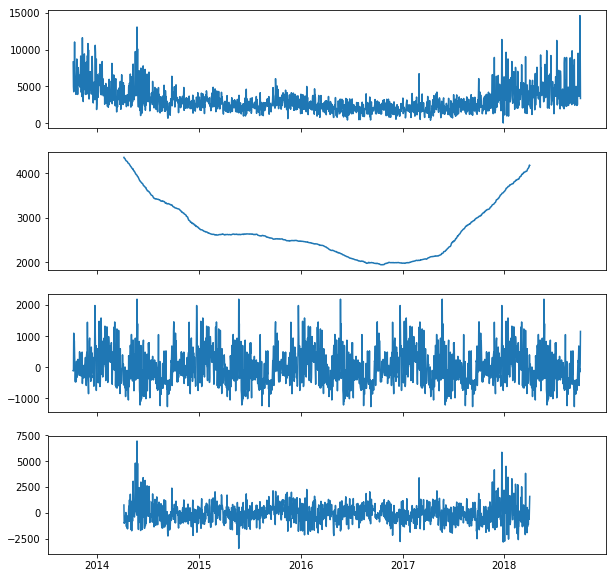

In [21]:
#Set up graph to make the view size larger
dimensions = (10,10)
#Set up four subplots
#Sharex = all subplots will share the same X axis
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex = 'all')

#Set up four subplots: non-stationary, trend, seasonality, and residuals
#Index(X axis) = measure of time for all plots 
ax1.plot(hulu.index, hulu['value'])
ax2.plot(hulu.index, decompose_model.trend)
ax3.plot(hulu.index, decompose_model.seasonal)
ax4.plot(hulu.index, decompose_model.resid)

### Plot Seasonality for One Year

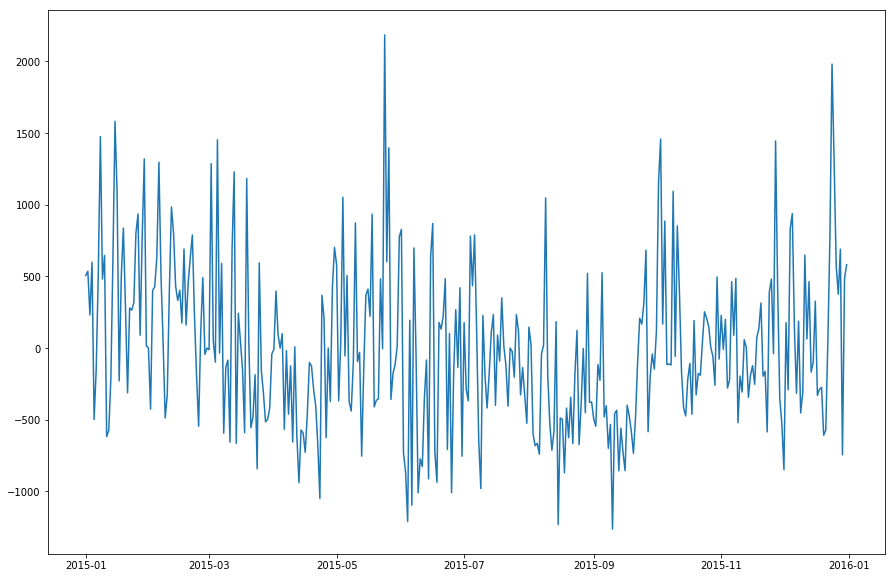

In [22]:
#Create new column named "seasonal" inside the Hulu data frame
hulu['seasonal'] = decompose_model.seasonal
#Extract one year of the data to examine seasonality on a smaller scale of the data
startdate= pd.to_datetime("2015-01-01").date()
enddate = pd.to_datetime("2015-12-31").date()
#Specify the date values of one year
oneyear = hulu.loc[startdate:enddate]
#Set up graph to make the view size larger
dimensions=(15,10)
fig, ax1 = pyplot.subplots(figsize=dimensions)
#Plot seasonality graph for one year of Hulu data
pyplot.plot(oneyear.index, oneyear.seasonal)